# Demo of `pythontools` library and Principal Component Analysis
### Load libraries
Import `pythontools` libraries.

In [280]:
import numpy as np
import arraytools as arry
import statstools as stats
import plottools as pt
%matplotlib inline

### Generate Data
Generate toy example data matrix `X` with 2 features.

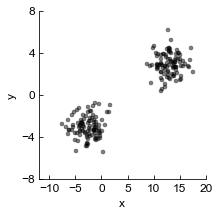

In [281]:
tempA = arry.concate([2*np.random.randn(100,1)-3, 1*np.random.randn(100,1)-3], axis=1)
tempB = arry.concate([2*np.random.randn(100,1)+13, 1*np.random.randn(100,1)+3], axis=1)
X = arry.concate([tempA, tempB])

pcolor = 'k'
alpha = 0.5
marker_size=4
fig, ax = pt.makefig(figsize=(3,3))
ax.plot(X[:,0], X[:,1], 'o', color=pcolor, markeredgecolor=pcolor, ms=marker_size, alpha=alpha)
pt.set_axis(ax, x_ticks=[-10,-5,0,5,10,15,20], y_ticks=[-8,-4,0,4,8])
pt.set_axis(ax, xlim=[-12,None], ylim=[-8,None])
pt.set_label(ax, x_label='x', y_label='y',)

### PCA
Run `statstools.pca` to perform Principal Component Analysis using covariance method.

In [282]:
C = stats.cov(X)
print(C)

[[ 1.00502513  0.92988874]
 [ 0.92988874  1.00502513]]


In [283]:
eigvec, eigval, proj = stats.pca(X)

##### Eigenvalues

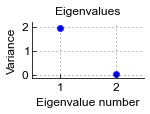

In [284]:
fig_size=(2,1)
fig, ax = pt.makefig(figsize=fig_size)
ax.plot(eigval, 'o', color='b', markeredgecolor='b')
pt.set_axis(ax, xlim=[-0.5,1.5], ylim=[-0.1,2.2],)
pt.set_axis(ax, x_ticks=range(2), x_ticks_label=np.arange(1,3), y_ticks=[0,1,2])
pt.set_label(ax, x_label='Eigenvalue number', y_label='Variance', title='Eigenvalues')
ax.grid()


##### Projections to PC1 and PC2

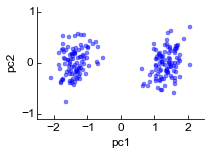

In [285]:
fig_size=(3,2)
fig, ax = pt.makefig(figsize=fig_size)
ax.plot(proj[:,0], proj[:,1], 'o', color='b', markeredgecolor='b', ms=marker_size, alpha=alpha)
pt.set_axis(ax, x_ticks=[-2,-1,0,1,2], y_ticks=[-1,0,1], xlim=[-2.5,2.5], ylim=[-1.1,1.1])
pt.set_label(ax, x_label='pc1', y_label='pc2',)

##### Principal components on normalized data points

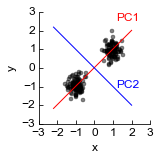

In [286]:
def pcLine(x, eigvec, mu):
    '''
    y = ax+b
    '''
    a = eigvec[1]/eigvec[0]
    b = mu[1] - a*mu[0]
    return a*x+b

B = stats.normalizeX(X)
mu_A = np.mean(B[range(tempA.shape[0]),:],0)
mu_B = np.mean(B[range(tempB.shape[0],B.shape[0]),:],0)
mid = np.mean(np.vstack((mu_A, mu_B)),0)
x = np.linspace(-2.2,2,100)
y1 = pcLine(x, eigvec[:,0], mu_A)
y2 = pcLine(x, eigvec[:,1], mid)

fig_size=(2,2)
fig, ax = pt.makefig(figsize=fig_size)
ax.plot(B[:,0], B[:,-1], 'o', color='k', markeredgecolor='k', ms=marker_size, alpha=alpha)
ax.plot(x, y1, 'r')
ax.plot(x, y2, 'b')
pt.set_axis(ax, xlim=[-3,3], ylim=[-3,3])
pt.set_label(ax, x_label='x', y_label='y',)
pt.text(ax, 'PC1', [0.7,0.9], 'r', ftsize=12)
pt.text(ax, 'PC2', [0.7,0.3], 'b', ftsize=12)